In [2]:
import pandas as pd 
import xml.etree.ElementTree as et 

xtree = et.parse('/content/drive/Shareddrives/APG_Smart Installation Mobility- Team Access/Machine learning/Notebooks/DataFromWatch/UCSD04.tcx')
xroot = xtree.getroot() 

df_cols = ["time","latitude","longitude","distanceinmeters","heartrate"]
rows = []





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
xroot

<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}TrainingCenterDatabase' at 0x7f623681a410>

In [4]:
xroot[0][0][1].tag

'{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap'

In [5]:
ctr=0
for lap in xroot[0][0].findall("{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap"):
    for node in lap[8].findall("{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Trackpoint"):
        if node[1].tag == "{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Position":
            time = node[0].text
            lat = node[1][0].text
            long = node[1][1].text
            dist= node[3].text
            bpm = node[4][0].text

            rows.append({"time": time, "latitude": lat, 
                            "longitude": long, "distanceinmeters": dist,
                            "heartrate":bpm})

    tracking_df = pd.DataFrame(rows, columns = df_cols)

IndexError: ignored

In [ ]:
tracking_df

,time,latitude,longitude,distanceinmeters,heartrate
0,2021-05-12T23:00:15.000Z,32.876304192468524,-117.24070401862264,0.0,95
1,2021-05-12T23:00:20.000Z,32.87655824795365,-117.24061349406838,19.639999389648438,98
2,2021-05-12T23:00:38.000Z,32.8765990678221,-117.24037234671414,43.279998779296875,101
3,2021-05-12T23:01:07.000Z,32.876395639032125,-117.24000530317426,93.41000366210938,100
4,2021-05-12T23:01:14.000Z,32.876326655969024,-117.24000094458461,101.0,104
...,...,...,...,...,...
1865,2021-05-19T00:33:41.000Z,32.878337474539876,-117.24248542450368,54824.41015625,145
1866,2021-06-20T20:19:15.000Z,32.87917432375252,-117.24095480516553,54824.9296875,72
1867,2021-06-20T20:19:16.000Z,32.87917667068541,-117.240950781852,54825.37890625,71
1868,2021-06-20T20:19:25.000Z,32.87925420328975,-117.2409148234874,54834.87890625,71


In [ ]:
def time_splitter (row):
   datetime=row['time'].split("T")
   return datetime[1]
  

In [ ]:
tracking_df["HHMMSS"]=tracking_df.apply (lambda row: time_splitter(row), axis=1)

In [ ]:
tracking_df

,time,latitude,longitude,distanceinmeters,heartrate,HHMMSS
0,2021-05-12T23:00:15.000Z,32.876304192468524,-117.24070401862264,0.0,95,23:00:15.000Z
1,2021-05-12T23:00:20.000Z,32.87655824795365,-117.24061349406838,19.639999389648438,98,23:00:20.000Z
2,2021-05-12T23:00:38.000Z,32.8765990678221,-117.24037234671414,43.279998779296875,101,23:00:38.000Z
3,2021-05-12T23:01:07.000Z,32.876395639032125,-117.24000530317426,93.41000366210938,100,23:01:07.000Z
4,2021-05-12T23:01:14.000Z,32.876326655969024,-117.24000094458461,101.0,104,23:01:14.000Z
...,...,...,...,...,...,...
1865,2021-05-19T00:33:41.000Z,32.878337474539876,-117.24248542450368,54824.41015625,145,00:33:41.000Z
1866,2021-06-20T20:19:15.000Z,32.87917432375252,-117.24095480516553,54824.9296875,72,20:19:15.000Z
1867,2021-06-20T20:19:16.000Z,32.87917667068541,-117.240950781852,54825.37890625,71,20:19:16.000Z
1868,2021-06-20T20:19:25.000Z,32.87925420328975,-117.2409148234874,54834.87890625,71,20:19:25.000Z


In [ ]:
tracking_df.distanceinmeters=tracking_df.distanceinmeters.astype(str).astype(float)

In [ ]:
meterscol=[]
for i,j in enumerate(tracking_df.distanceinmeters):
    meters=0
    if i>0:
        lastmet=tracking_df.distanceinmeters[i-1]
        met =j
        meters=met-lastmet
    meterscol.append(meters)


    

In [ ]:
tracking_df["meters"]=meterscol

In [ ]:
secondscol=[]
for i,j in enumerate(tracking_df.HHMMSS):
    seconds=0
    if i>0:
        lastmins=int(tracking_df.HHMMSS[i-1][3:5])
        lastsecs=int(tracking_df.HHMMSS[i-1][6:8])
        mins=int(j[3:5])
        secs=int(j[6:8])
        if lastmins==mins:
            seconds=secs-lastsecs
        else:
            seconds = (60-lastsecs)+secs
    secondscol.append(seconds)


In [ ]:
tracking_df["seconds"]=secondscol

In [ ]:
def calculate_speed(row):
    if (row.seconds>0):
        meterspersecond=row.meters/row.seconds
        milesperhour=meterspersecond*2.237
        return milesperhour
    else: return 0


In [ ]:
tracking_df["mph"]=tracking_df.apply (lambda row: calculate_speed(row), axis=1)

In [ ]:
tracking_df

,time,latitude,longitude,distanceinmeters,heartrate,HHMMSS,meters,seconds,mph
0,2021-05-12T23:00:15.000Z,32.876304192468524,-117.24070401862264,0.000000,95,23:00:15.000Z,0.000000,0,0.000000
1,2021-05-12T23:00:20.000Z,32.87655824795365,-117.24061349406838,19.639999,98,23:00:20.000Z,19.639999,5,8.786936
2,2021-05-12T23:00:38.000Z,32.8765990678221,-117.24037234671414,43.279999,101,23:00:38.000Z,23.639999,18,2.937927
3,2021-05-12T23:01:07.000Z,32.876395639032125,-117.24000530317426,93.410004,100,23:01:07.000Z,50.130005,29,3.866925
4,2021-05-12T23:01:14.000Z,32.876326655969024,-117.24000094458461,101.000000,104,23:01:14.000Z,7.589996,7,2.425546
...,...,...,...,...,...,...,...,...,...
1865,2021-05-19T00:33:41.000Z,32.878337474539876,-117.24248542450368,54824.410156,145,00:33:41.000Z,0.320312,2,0.358270
1866,2021-06-20T20:19:15.000Z,32.87917432375252,-117.24095480516553,54824.929688,72,20:19:15.000Z,0.519531,34,0.034182
1867,2021-06-20T20:19:16.000Z,32.87917667068541,-117.240950781852,54825.378906,71,20:19:16.000Z,0.449219,1,1.004902
1868,2021-06-20T20:19:25.000Z,32.87925420328975,-117.2409148234874,54834.878906,71,20:19:25.000Z,9.500000,9,2.361278


In [ ]:
tracking_df = tracking_df[tracking_df.mph < 85]

In [ ]:
tracking_df

,time,latitude,longitude,distanceinmeters,heartrate,HHMMSS,meters,seconds,mph
0,2021-04-27T20:05:10.000Z,32.86402562633157,-117.21616867929697,45.169998,73,20:05:10.000Z,0.000000,0,0.000000
1,2021-04-27T20:05:11.000Z,32.86402462050319,-117.21616775728762,45.169998,73,20:05:11.000Z,0.000000,1,0.000000
2,2021-04-27T20:05:16.000Z,32.864015232771635,-117.21618007868528,46.790001,70,20:05:16.000Z,1.620003,5,0.724789
3,2021-04-27T20:29:31.000Z,32.86396116949618,-117.21606658771634,96.809998,\n,20:29:31.000Z,50.019997,75,1.491930
4,2021-04-27T20:40:36.000Z,32.86394130438566,-117.21605971455574,130.149994,74,20:40:36.000Z,33.339996,65,1.147409
...,...,...,...,...,...,...,...,...,...
16931,2021-05-06T20:04:32.000Z,32.863982962444425,-117.21602727659047,269274.625000,\n,20:04:32.000Z,48.406250,73,1.483353
16932,2021-05-06T20:59:43.000Z,32.863993188366294,-117.21608125604689,269294.156250,\n,20:59:43.000Z,19.531250,71,0.615372
16933,2021-05-06T20:59:50.000Z,32.86399930715561,-117.21608402207494,269294.156250,73,20:59:50.000Z,0.000000,7,0.000000
16934,2021-05-06T20:59:51.000Z,32.863999558612704,-117.21608402207494,269294.156250,75,20:59:51.000Z,0.000000,1,0.000000


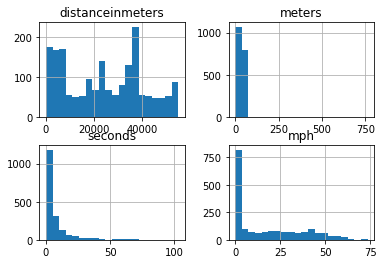

In [ ]:
hist = tracking_df.hist(bins=20)

In [ ]:
tracking_df.to_csv(r'/content/drive/Shareddrives/APG_Smart Installation Mobility- Team Access/Machine learning/Notebooks/converteData/3weeksdata.csv', index = False)